<a href="https://colab.research.google.com/github/Mukunthan14/RINEX-4-MAY-2022-DATA-SCIENCE/blob/main/MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Mukunthan14/RINEX-4-MAY-2022-DATA-SCIENCE/main/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


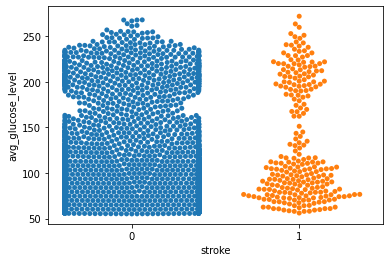

In [ ]:
import seaborn as sns
sns.swarmplot(x='stroke', y='avg_glucose_level', data=df) #Swarmplot for glucose level

In [ ]:
#DATA CLEANING
df_clean = df.drop(['id'], axis = 1)
df_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_clean.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_clean = df_clean.dropna()
df_clean.shape

(4909, 11)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
#ASSIGNING DUMMY VARIABLES
gender_d = pd.get_dummies(df_clean['gender'],drop_first=True)
smoking_status_d = pd.get_dummies(df_clean['smoking_status'],drop_first=True)

In [ ]:
#CONCATENATE NEW CLOUMNS
df_clean.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis=1,inplace=True)
df_clean = pd.concat([df_clean,gender_d,smoking_status_d],axis=1)
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,0


In [ ]:
#ASSIGNING INPUT AND OUPUT
x = df_clean.loc[:, df_clean.columns != 'stroke'].values
x

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       [49.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
y = df_clean.loc[:, df_clean.columns == 'stroke'].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#Apply CLASSIFIER
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=6000)

In [ ]:
#model fitting
model.fit(x_train,y_train.ravel())

LogisticRegression(max_iter=6000)

In [ ]:
#predictor variable
y_pred = model.predict(x_test)
y_pred # predicted outputs

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test # actual outputs

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_pred2 = model.predict(x_test[100:103]) #INDIVIDUAL PREDICTION
y_pred2

array([0, 0, 0])

In [ ]:
y_test[100:103]

array([[0],
       [0],
       [0]])

In [ ]:
#to check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

96.00977198697068

In [ ]:
import joblib
joblib.dump(model, 'Logistic regression model')

['Logistic regression model']